# BIKE SHARING ANALYSIS

In this project,we will analyze bike sharing services and indentify usage patterns
depending on timr features and weather conditions.
As we go alomg,we will apply concepts such as visual analysis,hypothesis testing,and 
time series analysis to the dataset.

Objective:To learn how to use time series data and apply some main data analysis techniques to business scenarios

Website-https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#

# Data Collection

In [4]:
#importing libraries

In [5]:
#Write Your Code Below
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#loading the hourly-dataset

In [7]:
data =pd.read_csv('Data\hour.csv')

In [8]:
#overview of the dataset
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Understanding the Data

In [9]:
#All info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
#checking the shape of the data
data.shape

(17379, 17)

In [11]:
#checking the size of the dataset
data.size

295443

In [12]:
#Basic info about the dataframe
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
#Another alternative method of checking the basic statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [14]:
#showing the total numbers of unique values
data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [15]:
#checking for null values in the dataset
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
data.index

RangeIndex(start=0, stop=17379, step=1)

In [17]:
#showing columns in the data
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [18]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Data Preprocessing

we perform some preprocessing steps, which will allow us 
to transform the data into a more human-readable format.

 we will perform some basic transformations on the columns, 
which will result in a more easy-to-understand analysis at a later stage.

In [19]:
#preprocessing temporal and weather features

The seasons column contains values from 1 to 
4, which encode, respectively, the Winter, Spring, Summer, and Fall seasons. 
The yr column contains the values 0 and 1 representing 2011 and 2012, while the 
weekday column contains values from 0 to 6, with each one representing a day 
of the week (0: Sunday, 1: Monday, through to 6: Saturday). Furthermore, we 
scale the hum column to values between 0 and 100 (as it represents the humidity 
percentage), and the windspeed column to values between 0 and 67 (as those are 
the registered minimum and maximum wind speed): 

Step 1:Create a copy of the original data

In [20]:
preprocessed_data = data.copy()

In [21]:
#change the season variables from numerical to categorical.
#we first create the python dictionary,which contains the encoding,then apply the lambda functions

In [22]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', \
                   3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season']\
                              .apply(lambda x: seasons_mapping[x])

In [23]:
#transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr']\
                          .apply(lambda x: yr_mapping[x])

In [24]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday']\
                               .apply(lambda x: weekday_mapping[x])

In [25]:
#transfrom mnth
mnth_mapping = {1: 'January', 2: 'February', 3: 'March', \
                   4: 'April', 5: 'May', 6: 'June', \
                   7: 'July', 8: 'August', 9: 'September', \
                  10: 'October', 11: 'November', 12: 'December'} 
preprocessed_data['mnth'] = preprocessed_data['mnth']\
                               .apply(lambda x: mnth_mapping[x])

In [26]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit']\
                                  .apply(lambda x: \
weather_mapping[x])


In [27]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']\
                                 *67

In [28]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday','mnth', \
        'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,mnth,weathersit,hum,windspeed
5792,summer,2011,Saturday,September,clear,74.0,8.9981
7823,fall,2011,Sunday,November,clear,43.0,31.0009
15426,fall,2012,Tuesday,October,cloudy,77.0,6.0032
15028,fall,2012,Sunday,September,clear,51.0,22.0028
12290,spring,2012,Friday,June,cloudy,89.0,12.9980
3262,spring,2011,Friday,May,clear,64.0,7.0015
10763,spring,2012,Thursday,March,clear,42.0,23.9994
12384,spring,2012,Tuesday,June,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,September,clear,52.0,19.0012
948,winter,2011,Saturday,February,clear,80.0,0.0000


Observation:As you can see above,we transformed numerical data into categorical
data to make it easier to read and understand.

Note also that we didnt transfrom the atemp and temp because thats their true
perceived temperatures

# Analysis of Registered versus Casual Use 

We begin our analysis of the single features by focusing on the two main ones: 
the number of rides performed by registered users versus the number of rides 
performed by non-registered (or casual) ones

**Note: cnt represents the sum of the registered and casual columns**

In [29]:
"""
assert that total number of rides is equal to the sum of registered and 
casual ones
"""
assert (preprocessed_data.casual \
        + preprocessed_data.registered \
        == preprocessed_data.cnt).all(), \
       'Sum of casual and registered rides not equal '\
 'to total number of rides'

**visualizing the distribution of the registered and casual rides**

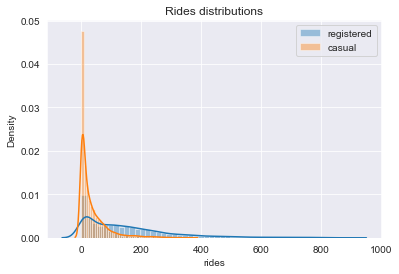

In [30]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
plt.savefig('Output/rides__distribution_png.png')

Observation:the registered users perform more rides than the casual users
Also we can see the casual rides most entries started from zero and it declines 
as the rides increases to 400
On the registered more rides were higher than 800 but also ,most entries started from zero

**Let's now focus on the evolution of rides over time. We can analyze the number of rides each day with the following piece of code:**

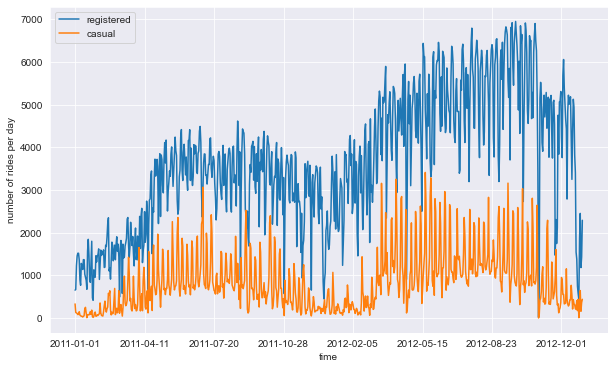

In [31]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('Output/number__of_rides_per_day_png.png')

we first take a subset of the original preprocessed_data dataset. Afterward, 
we compute the total number of rides for each day by first grouping the data by 
the dteday column, and then summing the single entries for the casual and 
registered columns. The result of the code snippet is given in the following figure:

Observation:the registered rides is higher than the casual rides per day.But we can
 see that the overall rides decreases in winter seasons because of the weather
conditions.So bad weather and low temperatures have a 
negative impact on ride sharing services

**One way to smooth out the curves is to take 
the rolling mean and standard deviation of the two time series and plot those instead
In this way, we can visualize not only the average number of rides for a specific time 
period (also known as a window) but also the expected deviation from the mean:**

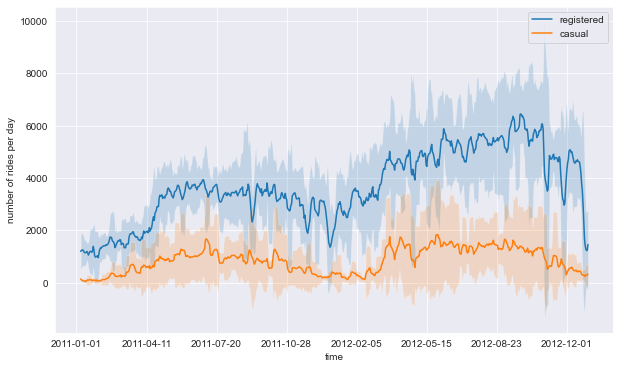

In [32]:
"""
Create new dataframe with necessary for plotting columns, and obtain 
number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling 
means, then we color the zone between the series of rolling means +- 2 
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_deviations['registered'], \
                rolling_means['registered'] \
                - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] \
                + 2*rolling_deviations['casual'], \
                rolling_means['casual'] \
                - 2*rolling_deviations['casual'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('Output/The_rolling_mean_and_standard_deviation_of_rides_png.png')

In order to compute the rolling statistics (that is, the mean and standard deviation), 
we use the rolling() function, in which we use mean() and std() to compute 
the rolling mean and standard deviation, respectively.

**Analysis of the distributions of the requests over separate hours and days of 
the week.**

We would expect certain time patterns to arise, as bike requests should be 
more frequent during certain hours of the day, depending on the day of the week. 

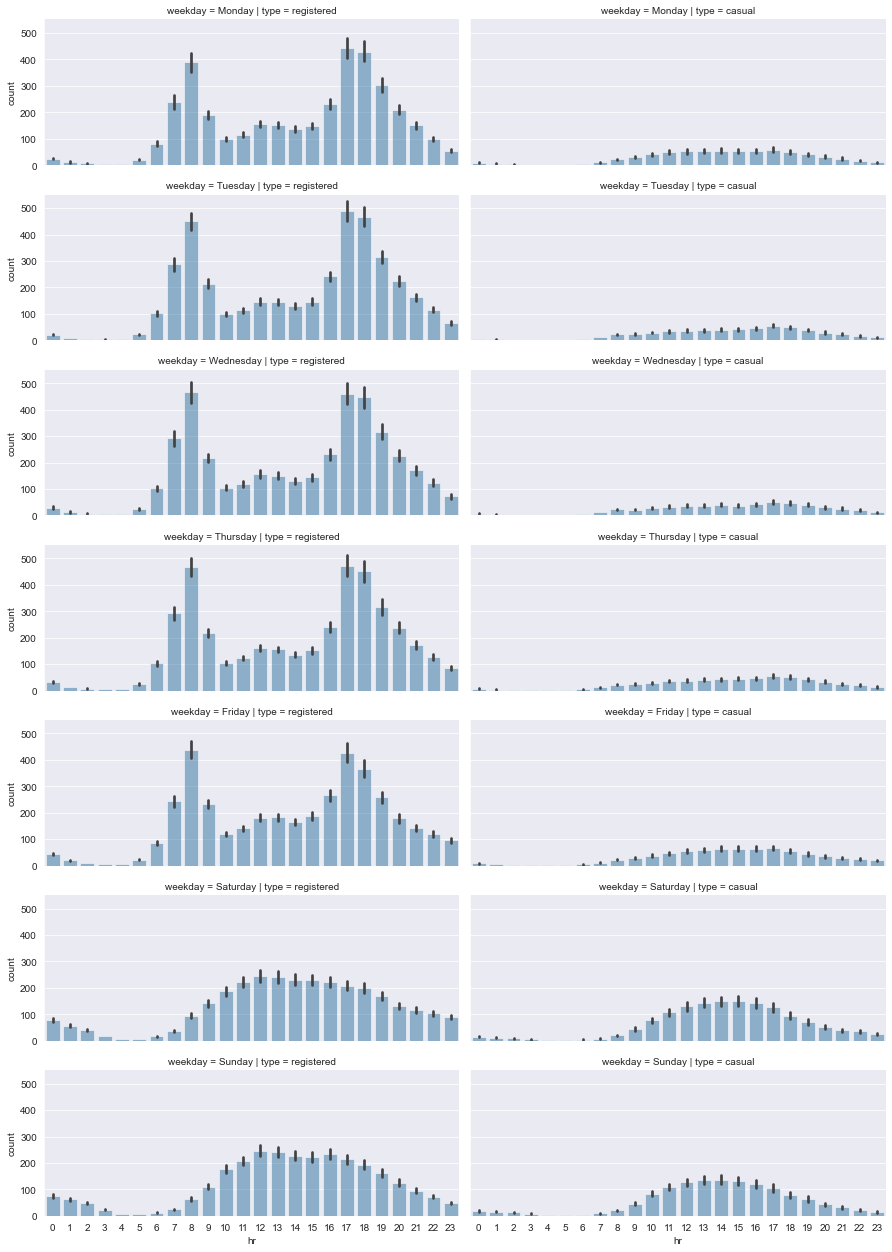

In [33]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]
"""
transform the data into a format, in number of entries are computed as 
count, 
for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], \
                           var_name='type', value_name='count')
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', \
                     col='type', height=2.5, aspect=2.5, \
                     row_order=['Monday', 'Tuesday', \
                                'Wednesday', 'Thursday', \
'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
plt.savefig('Output/Registered_casual_hourly_weekly_png.png')

Let's focus on the melt() function, applied on a pandas dataset. It will create a new 
dataset, in which values are grouped by the hr and weekday columns, while creating 
two new columns: type (containing the casual and registered values) and 
count (containing the respective counts for the casual and registered types).

The seaborn.FacetGrid() function will create a new grid of plots, with rows 
corresponding to the different days of the week and columns corresponding to the 
types. Finally, the map() function is applied to each element of the grid, creating the 
respective plots.

Observation:We can immediately note 
that on working days, the highest number of rides for registered users takes place 
around 8 AM and at 6 PM.This is totally in line with our expectations, as it is likely that 
most registered users use the bike sharing service for commuting. On the other hand, 
the casual usage of bike sharing services on working days is quite limited, as the 
plot shows

During the weekend, we can see that ride distributions change for both casual and 
registered users. Still, registered rides are more frequent than casual ones, but both 
the distributions have the same shape, almost uniformly distributed between the 
time interval of 11 AM to 6 PM

As a conclusion, we could claim that most of the usage of bike sharing services occurs 
during working days, right before and right after the standard working time (that is, 9 
to 5):


**Analyzing Seasonal Impact on Rides**

In this exercise, we will investigate the impact of the different seasons on the total 
number of rides. Our goal is to create grid plots, similar to the one above, in 
which the number of rides will be distributed over hours and weekdays, based on the 
current season. This exercise is a continuation of Preprocessing Temporal 
and Weather Features:

In [34]:
# select subset of the data
plot_data = preprocessed_data[['hr', 'season', \
                               'registered', 'casual']]

In [35]:
# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], \
                           var_name='type', value_name='count')

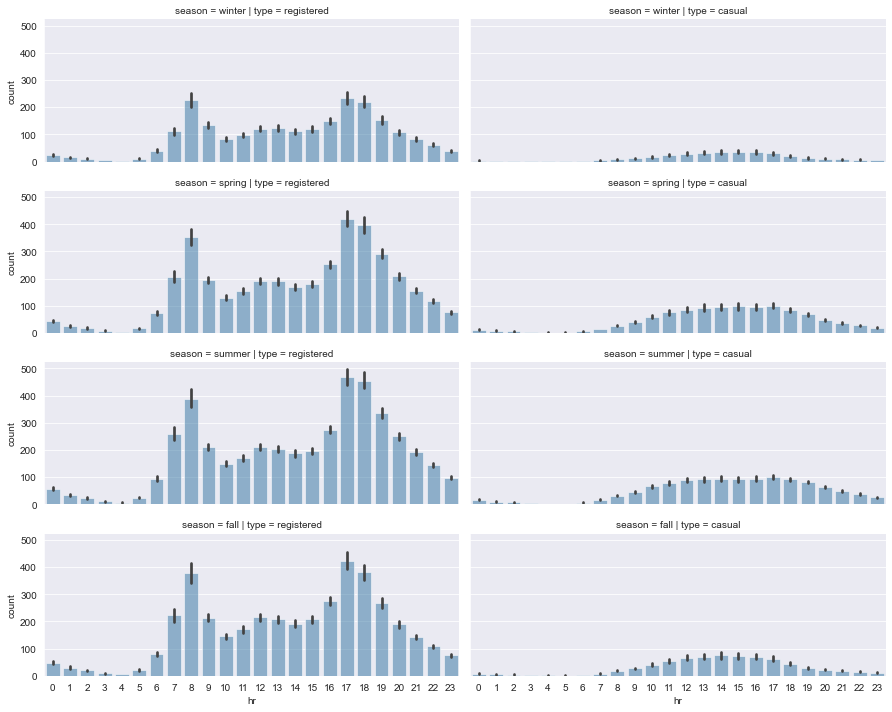

In [37]:
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', \
                     col='type', height=2.5, \
                     aspect=2.5, \
                     row_order=['winter', 'spring', \
                                'summer', 'fall'])
# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
plt.savefig('Output/hr_count_png.png')


Observation:As can be seen in the plot, while each season has a similar graph shape, the 
count is lower for the winter graph. So there are fewer rides (registered and 
casual) during winter. This makes sense, as fewer rides are likely to occur when 
the weather conditions are poor.

**the distribution of rides on a weekday basis**

In [39]:
plot_data = preprocessed_data[['weekday', 'season', \
                               'registered', 'casual']]

In [40]:
plot_data = plot_data.melt(id_vars=['weekday', 'season'], \
                           var_name='type', value_name='count')

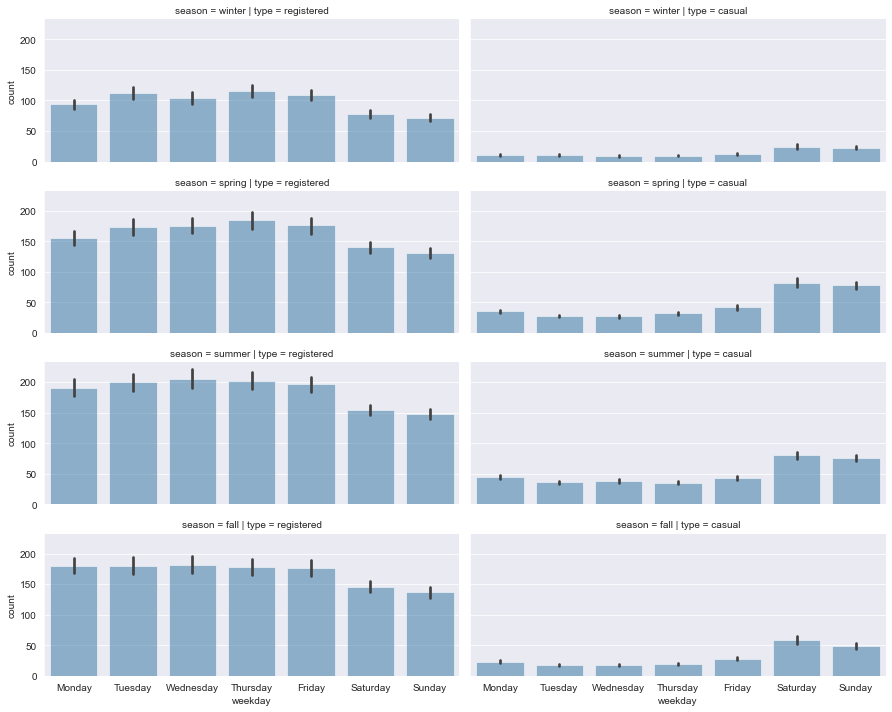

In [41]:
grid = sns.FacetGrid(plot_data, row='season', col='type', \
                     height=2.5, aspect=2.5, \
                     row_order=['winter', 'spring', \
                                'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, \
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', \
                'Friday', 'Saturday', 'Sunday'])
plt.savefig('Output/weekly_seasonal_png.png')

Observation:There is decrease number of registered rides on the weekend compared to the week day. While the number of casual rides increases over the weekend

Findings:We could say that the registered users use the bike sharing service
for commuting which could be the reason for the descrease in the number of
registered rides on the weekend while casual customers 
use the service occasionally over the weekend. 

Conclusion, we cannot make such assumptions based on the plots above,we need
to back our findings with statistical tests

# PART 2:PERFORMING HYPOTHESIS TESTING ON OUR DATA

**Task:Estimating Average Registered Rides**

In [42]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()

Suppose now that you perform certain measurements, trying to estimate the 
true average number of rides performed by registered users. For example, 
register all the rides during the summer of 2011 (this is going to be your sample):

In [43]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season \
                            == "summer") \
& (preprocessed_data.yr \
== 2011)].registered


In [44]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, \
p-value: {test_result[1]}")

Test statistic: -3.491969148378619, p-value: 0.0004887645279519517


Obersavation:The result of the previous test returns a p-value smaller than 0.001, which is less 
than the predefined critical value. Therefore, you can reject the null hypothesis 
and assume that the alternative hypothesis is correct.

Note that you have to make an important observation here: You computed the 
average number of rides on the true population; therefore, the value computed 
by the statistical test should be the same. So why have you rejected the null 
hypothesis? The answer to that question lies in the fact that your sample is not 
a true representation of the population, but rather a biased one. In fact, you 
selected only entries from the summer of 2011. Therefore, neither data from the 
full year is present, nor entries from 2012.

In order to show how such mistakes can compromise the results of statistical 
tests, perform the test again, but this time taking as a sample 5% of the 
registered rides (selected randomly). The following code snippet performs that:

In [45]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, \
 population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]}, \
p-value: {test_result_unbiased[1]}")

Unbiased test statistic: -0.48790457424568706, p-value: 0.6257406497438426


This time, the computed p-value is equal to 0.45, which is much larger than the critical 
0.05, and so, you cannot reject the null hypothesis.

**Hypothesis Testing on Registered Rides**

In [46]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)
# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

In [47]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


The resulting p-value from this test is less than 0.0001, which is far below the 
standard critical 0.05 value. As a conclusion, we can reject the null hypothesis 
and confirm that our initial observation is correct: that is, there is a statistically 
significant difference between the number of rides performed during working 
days and the weekend.

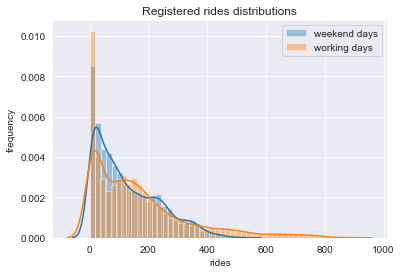

In [48]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")

plt.savefig('Output/Registered_rides_weekly_png.png')

Perform the same type of hypothesis testing to validate the second assumption 
from the last section— that is, casual users perform more rides during the 
weekend. In this case, the null hypothesis is that the average number of rides 
during working days is the same as the average number of rides during the 
weekend, both performed only by casual customers. The alternative hypothesis 
will then result in a statistically significant difference in the average number of 
rides between the two groups:

Statistic value: 41.077, p-value: 0.000


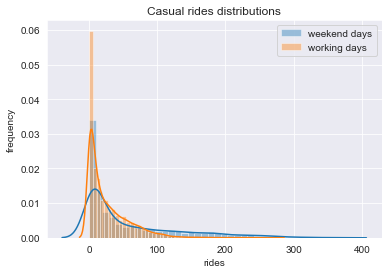

In [50]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]
# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")
# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
plt.savefig('Output/Casual_rides_png.png')

The p-value returned from the previous code snippet is 0, which is strong 
evidence against the null hypothesis. Hence, we can conclude that casual 
customers also behave differently over the weekend (in this case, they tend to 
use the bike sharing service more) as seen in the following figure:

In conclusion, we can say that there is a statistically significant difference between 
the number of rides on working days and weekend days for both casual and 
registered customers. 

**Analysis of Weather-Related Features**

Let's now focus on an analysis of the group of features representing the weather 
conditions. Our expectation is to observe a strong dependency of those features on 
the current number of rides, as bad weather can significantly influence bike 
sharing services

In [51]:
def plot_correlations(data, col):
# get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Registered rides \
                     (correlation: {corr_r:.3f})")
# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, \
                     scatter_kws={"alpha":0.05}, \
                     label=f"Casual rides (correlation: {corr_c:.3f})")
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

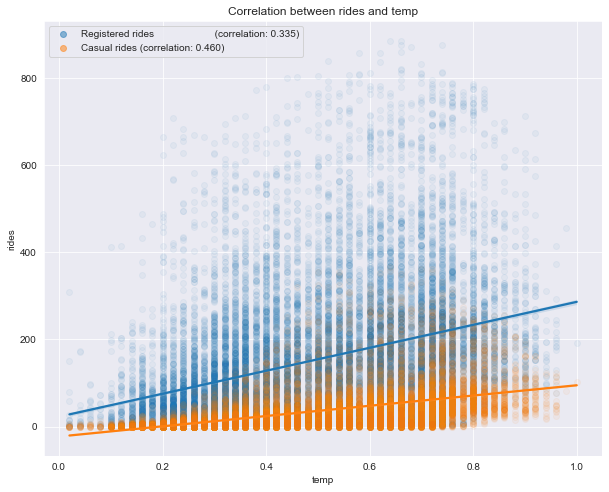

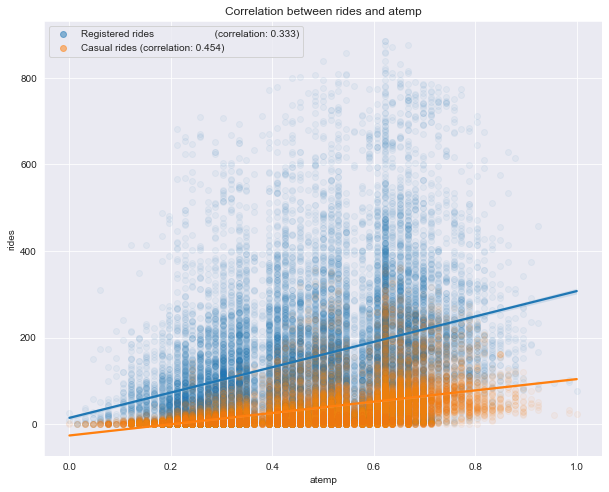

In [55]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')

plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.savefig('Output/rides_temp_corr_png.png')

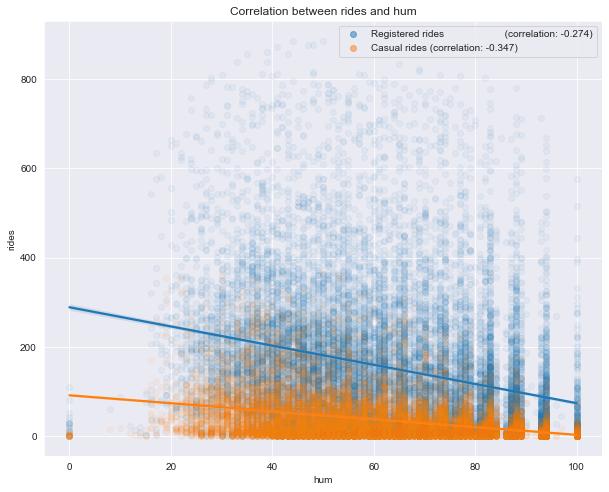

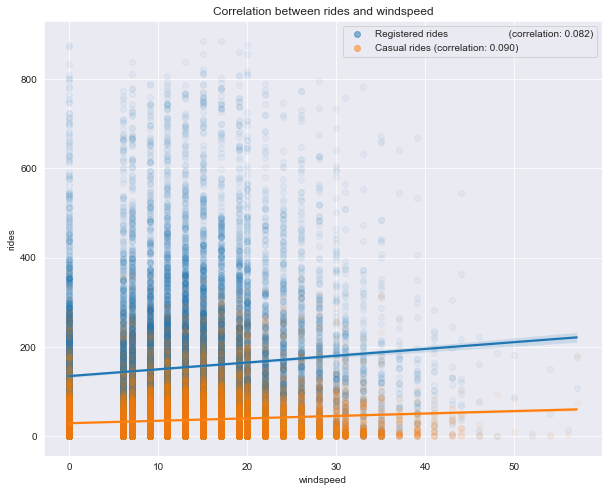

In [56]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')

plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.savefig('Output/rides_hum_corr_png.png')


Observation:that higher temperatures have a positive impact 
on the number of rides (the correlation between registered/casual rides and temp is 0.335 and 0.46, respectively, and it's a similar case for atemp). 

Note that as the values in the registered column are widely spread with respect to the different values in temp, we have a lower correlation compared to the casual column. The same pattern can be observed in Figure 1.21, in which the humidity level has a negative correlation with both types of rides (-0.274 for registered and -0.347 for casual). This means that with a high level of humidity (mist or rain), customers will tend not to use the bike sharing service. From Figure 1.22, we can see that there is minimal 
correlation between the number of rides and the wind speed (a weak 
positive correlation).


One of the major drawbacks of the correlation coefficient is its assumption of a linear 
relationship between the two random variables. This is quite a strong assumption as, 
most of the time, relationships in nature are not linear. A measure that generalizes 
the Pearson's correlation to monotonic relationships between two variables is the 
Spearman rank correlation.

**Evaluating the Difference between the Pearson and Spearman Correlations**

In this exercise, you will investigate the difference between the Pearson correlation (in 
which a linear relationship between the two variables is assumed) and the Spearman 
correlation (in which only a monotonic relationship is required). This will help you to 
understand the difference between the two types of correlations, especially when the 
data does not satisfy the linear assumption.
To better present the difference between 
the two measures, you will create synthetic data that will serve your purpose

In [57]:
# define random variables
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)


In [58]:
# compute correlations
from scipy.stats import pearsonr, spearmanr
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

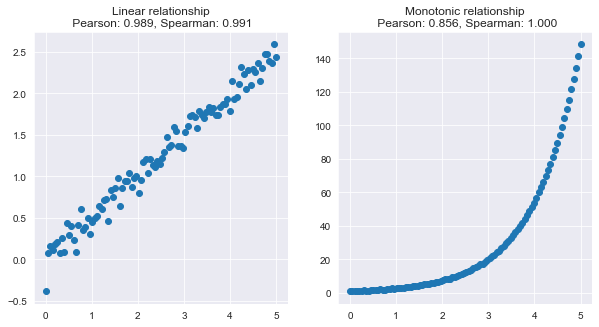

In [59]:
# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n \
Pearson: {corr_lin_pearson:.3f}, \
Spearman: {corr_lin_spearman:.3f}")
ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship\n \
Pearson: {corr_mon_pearson:.3f}, \
Spearman: {corr_mon_spearman:.3f}")
plt.savefig('Output/spearman_pearson_corr_png.png')

As you can see from the preceding figure, when the relationship between the 
two variables is linear (the figure on the left), the two correlation coefficients 
are very similar. In the monotonic relationship (the figure on the right), the 
linear assumption of the Pearson correlation fails, and, although the correlation 
coefficient is still quite high (0.856), it is not capable of capturing the perfect 
relationship between the two variables. On the other hand, the Spearman 
correlation coefficient is 1, which means that it succeeds in capturing the almost 
perfect relationship between the two variables.


Now return to the bike sharing data and investigate the relationship between 
the different variables in light of the difference between the two correlation 
measures. Define a function that, on the provided data and column, computes 
the Pearson and Spearman correlation coefficients with the registered and 
casual rides:

In [60]:
# define function for computing correlations
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,\
                      "Spearman (registered)": spearman_reg,\
"Pearson (casual)": pearson_cas,\
"Spearman (casual)": spearman_cas})

In [61]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", \
                                "Spearman (registered)",\
"Pearson (casual)", \
"Spearman (casual)"])
for col in cols:
    corr_data[col]=compute_correlations(preprocessed_data, col)
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


As we can observe, for most of the variables, the Pearson and Spearman correlation 
coefficient are close enough (some non-linearity is to be expected). The most striking 
difference between the two coefficients occurs when comparing the temp (and 
atemp) and casual columns. More precisely, the Spearman correlation is quite 
high, meaning that there is significant evidence for a nonlinear, relatively strong and 
positive relationship. 
An interpretation of this result is that casual customers are far keener on using the 
bike sharing service when temperatures are higher. We have already seen from our 
previous analysis that casual customers ride mostly during the weekend, and they 
do not rely on bike sharing services for commuting to work. This conclusion is again 
confirmed by the strong relationship with temperature, as opposed to registered 
customers, whose rides have a weaker correlation with temperature.

# Correlation Matrix Plot

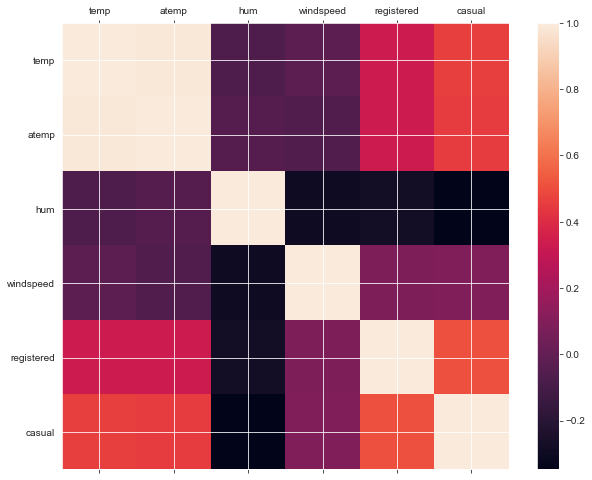

In [62]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", \
        "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
plt.savefig('Output/corr_matt_png.png')

**This concludes our analysis of the weather columns and their impact on the number 
of rides. In the next section, we will exploit more advanced techniques for timedependent features, known as time series analysis.**


In [81]:
#End of project